In [9]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Modern Data Science Problems (problems till 27.11)
by *Nora Salone* 

### Problem 28

We want to use the KNN algorithm for the classification problem. We consider a
training sample of $N=10^6$ points, which are distributed approximately uniformly on the
available feature space . Calculate the mean distance between neighbors assuming:
* The feature space is 1-D X =[X1], X1 in the range of [0,1]
* The feature space is 2-D X =[X1 ,X2 ], Xi in the range of [0,1] 
* The feature space is 3-D X =[X1,X2 , X3 ], Xi in the range of [0,1]
* The feature space is 10-D X =[X1,X2 , X3 ,…, X10 ], Xi in the range of [0,1]
* How many points do we need for 10-D feature space to keep the same distance between the neighbors as in the first case ?

The average distance between points is calculated as

$$ \Delta x \sim \frac{1}{\sqrt[d]{N}}$$

given $N$ points in $d$ dimensions, based on the approximation $\frac{1}{N-1} \sim \frac{1}{N}$ since we look at $N >> 1$. For $N=10^6$ we get

$$ \Delta x \sim \frac{1}{\sqrt[10]{10^6}}$$

To get the same distance as in 1-D feature space, which is

$$\Delta x = \frac{1}{N} = \frac{1}{10^6} $$

we need to have

$$\frac{1}{10^6} \sim \frac{1}{\sqrt[10]{N}} \quad \Longrightarrow \quad N = (10^6)^{10} = 10^{60} \text{ points.}$$

### Problem 29
Derive OLS solution for simple linear regression model $f_θ(x) = θ_1 \cdot x + θ_0$.

Derive the Ordinary Least Square solution for this simple linear regression model, $f_\theta = \theta_1 x + \theta_0$: we start with the MSE training error

$$E_T = \frac{1}{N}\sum_i (\theta_1 x_i + \theta_0 -y_i)^2$$

and its the partial derivatives with respect to the parameters $\theta_1$, $\theta_0$

$$\frac{\partial E}{\partial \theta_0} = \frac{2}{N} \sum_i(\theta_1 x_i + \theta_0 -y_i)\\
\frac{\partial E}{\partial \theta_1} = \frac{2}{N} \sum_i(\theta_1 x_i + \theta_0 -y_i)x_i$$

We look for the minima of $E_T$ with respect to the parameters $\theta_0$, $\theta_1$:

$$\theta_1\sum_i x_i + N\theta_0 -\sum_i y_i = 0 \\
\theta_1\sum_i x_i^2 + \theta_0\sum_i x_i -\sum_i y_i x_i = 0$$

This linear system of equations in $\theta_0$, $\theta_1$ can be represented by the matrix

$$
\left(\begin{array}{cc} 
N & \sum_i x_i\\
\sum_i x_i & \sum_i x_i^2
\end{array}|\begin{array}{c} 
\sum_i y_i\\ 
\sum_i x_i y_i
\end{array}\right)
$$ 

which we reduce to solve the system of equations, as

$$
\left(\begin{array}{cc} 
N & \sum_i x_i\\
0 & \big(\sum_i x_i\big)^2-N\sum_i x_i^2
\end{array}|\begin{array}{c} 
\sum_i y_i\\ 
\big(\sum_i x_i\big)\sum_i y_i-N\sum_i x_i y_i
\end{array}\right)
$$ 

from where one gets that

$$\theta_1 = \frac{\big(\sum_i x_i\big)\sum_i y_i-N\sum_i x_i y_i}{\big(\sum_i x_i\big)^2-N\sum_i x_i^2} = \frac{\big(\sum_i \frac{x_i}{N}\big)\sum_i \frac{y_i}{N}-\frac{1}{N}\sum_i x_i y_i}{\big(\sum_i \frac{x_i}{N}\big)^2-\frac{1}{N}\sum_i x_i^2} = \frac{E(xy)-E(x)E(y)}{E(x^2)-E(x)^2} = \frac{cov(x,y)}{var(x)}\\
\theta_0 = E(y)-E(x)\theta_1$$

$\theta_0$ was obtained by dividing the respective row in the matrix by $N^2$ and applying the same subtitutions of the sums into definitions that we used for $\theta_1$. Hence, the OLS solution for this linear regression is

$$\theta_1 =\frac{cov(x,y)}{var(x)}\\
\theta_0 = -E(x)\frac{cov(x,y)}{var(x)} + E(y) = \frac{E(y)E(x^2)-E(x)E(xy)}{var(x)}$$


### Problem 30
Download the data file from:
http://koza.if.uj.edu.pl/~krzemien/machine_learning2021/materials/datasets/data1.csv
and write a program that for every dataset separately calculates:
* E[X], E[Y],
* Var(X), Var(Y),
* Cov(X,Y)
* Pearson correlation coefficients

Visualize the data (X vs Y). Visualize the means and variances for all datasets (e.g. E[X] vs dataset number)

Notebook: https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/intro/simple_load_data.ipynb

In [11]:
input_file = 'data1.csv'

In [12]:
data = pd.read_csv(input_file)

In [13]:
data.head()

,x,y,dataSet
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


In [14]:
data.dtypes

x            int64
y          float64
dataSet      int64
dtype: object

In [15]:
print(data.columns.values)

['x' 'y' 'dataSet']


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        44 non-null     int64  
 1   y        44 non-null     float64
 2   dataSet  44 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [17]:
data.describe()

,x,y,dataSet
count,44.000000,44.000000,44.00000
mean,9.000000,7.500682,1.50000
std,3.198837,1.958925,1.13096
min,4.000000,3.100000,0.00000
25%,7.000000,6.117500,0.75000
50%,8.000000,7.520000,1.50000
75%,11.000000,8.747500,2.25000
max,19.000000,12.740000,3.00000


In [18]:
data[data['dataSet']==0].count()

x          11
y          11
dataSet    11
dtype: int64

In [19]:
data.count()

x          44
y          44
dataSet    44
dtype: int64

In [20]:
data[['y','dataSet']].groupby(['dataSet'],as_index=False).mean().sort_values(by='dataSet')

,dataSet,y
0,0,7.500909
1,1,7.500909
2,2,7.500000
3,3,7.500909


In [21]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

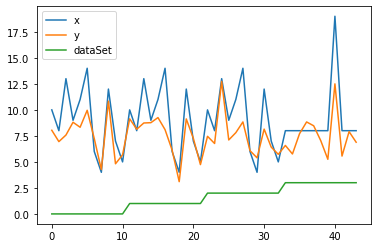

In [22]:
data.plot()

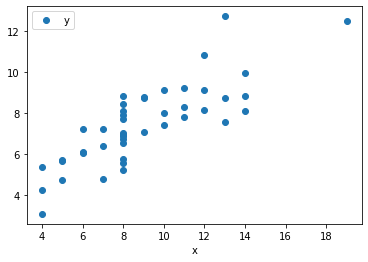

In [23]:
data.plot(x='x', y='y', style='o')

In [24]:
def expval(X): #expected value
    expval = sum(X)/len(X)
    return expval

def variance(X):
    diff=[]
    square=[]
    for i in range(len(X)):
        diff.append(X[i]-expval(X))   
        square.append(diff[i]*diff[i])
    var = expval(square)
    return var

def covariance(X,Y):
    prod=[]
    for i in range(len(X)):
        prod.append(X[i]*Y[i])    
    cov = expval(prod)-expval(X)*expval(Y)
    return cov

def std_dev(X):
    std = np.sqrt(variance(X))
    return std

def pears_rho(X,Y):
    rho = covariance(X,Y)/(std_dev(X)*std_dev(Y))
    return rho    

In [25]:
df = pd.DataFrame(data)
index = df.index
columns = df.columns
values = df.values

In [26]:
x =df['x']
y = df['y']
E_x = expval(x)
E_y = expval(y)
Var_x = variance(x)
Var_y = variance(y)
Cov_xy = covariance(x,y)
rho_xy = pears_rho(x,y)

print("Expected values: E[X]=",E_x,", E[Y]=",E_y)
print("Variances: Var(X)=",Var_x,", Var(Y)=",Var_y)
print("Covariance: Cov(X,Y)=",Cov_xy,", Pearson coefficient: rho_XY=",rho_xy)

Expected values: E[X]= 9.0 , E[Y]= 7.50068181818182
Variances: Var(X)= 10.0 , Var(Y)= 3.7501745351239677
Covariance: Cov(X,Y)= 4.999318181818168 , Pearson coefficient: rho_XY= 0.8163662427614676


Visualize the means and variances for all datasets (e.g. E[X] vs dataset number)

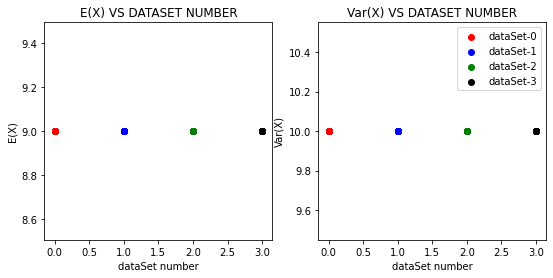

In [28]:
datax = data[['x','dataSet']] #my effort to select the data befor discovering panda
x0=[]
x1=[]
x2=[]
x3=[]
for i in range(len(data)):
    dataset = data.loc[i][2]
    if dataset == 0:
        x0.append(data.loc[i][0])
    elif dataset == 1:
        x1.append(data.loc[i][0])
    elif dataset == 2:
        x2.append(data.loc[i][0])
    elif dataset == 3:
        x3.append(data.loc[i][0])
        
#panda  x0 = data[data['dataSet']==0]
#x1 = data[data['dataSet']==1]
#x2 = data[data['dataSet']==2]
#x3 = data[data['dataSet']==3]

E0=expval(x0)
E1=expval(x1)
E2=expval(x2)
E3=expval(x3)
V0=variance(x0)
V1=variance(x1)
V2=variance(x2)
V3=variance(x3)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9, 4))
ax1.set_title("E(X) VS DATASET NUMBER")
ax1.set_xlabel("dataSet number")
ax1.set_ylabel("E(X)")
ax1.scatter([0]*len(x0), np.array([E0]*len(x0)), label="dataSet-0", color = "red")
ax1.scatter([1]*len(x1), np.array([E1]*len(x1)), label="dataSet-1", color = "blue")
ax1.scatter([2]*len(x2), np.array([E2]*len(x2)), label="dataSet-2", color = "green")
ax1.scatter([3]*len(x3), np.array([E3]*len(x3)), label="dataSet-3", color = "black")

ax2.set_title("Var(X) VS DATASET NUMBER")
ax2.set_xlabel("dataSet number")
ax2.set_ylabel("Var(X)")
ax2.scatter([0]*len(x0), np.array([V0]*len(x0)), label="dataSet-0", color = "red")
ax2.scatter([1]*len(x1), np.array([V1]*len(x1)), label="dataSet-1", color = "blue")
ax2.scatter([2]*len(x2), np.array([V2]*len(x2)), label="dataSet-2", color = "green")
ax2.scatter([3]*len(x3), np.array([V3]*len(x3)), label="dataSet-3", color = "black")

plt.legend()
plt.show()

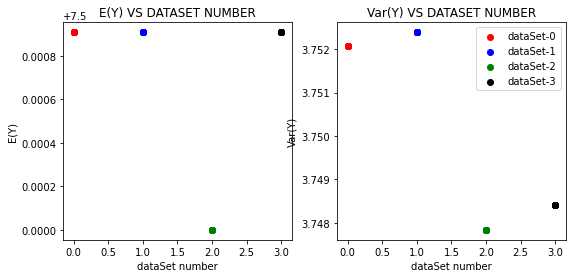

In [29]:
datay = data[['y','dataSet']]
y0=[]
y1=[]
y2=[]
y3=[]
for i in range(len(data)):
    dataset = data.loc[i][2]
    if dataset == 0:
        y0.append(data.loc[i][1])
    elif dataset == 1:
        y1.append(data.loc[i][1])
    elif dataset == 2:
        y2.append(data.loc[i][1])
    elif dataset == 3:
        y3.append(data.loc[i][1])

E0=expval(y0)
E1=expval(y1)
E2=expval(y2)
E3=expval(y3)
V0=variance(y0)
V1=variance(y1)
V2=variance(y2)
V3=variance(y3)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9, 4))
ax1.set_title("E(Y) VS DATASET NUMBER")
ax1.set_xlabel("dataSet number")
ax1.set_ylabel("E(Y)")
ax1.scatter([0]*len(y0), np.array([E0]*len(y0)), label="dataSet-0", color = "red")
ax1.scatter([1]*len(y1), np.array([E1]*len(y1)), label="dataSet-1", color = "blue")
ax1.scatter([2]*len(y2), np.array([E2]*len(y2)), label="dataSet-2", color = "green")
ax1.scatter([3]*len(y3), np.array([E3]*len(y3)), label="dataSet-3", color = "black")

ax2.set_title("Var(Y) VS DATASET NUMBER")
ax2.set_xlabel("dataSet number")
ax2.set_ylabel("Var(Y)")
ax2.scatter([0]*len(y0), np.array([V0]*len(y0)), label="dataSet-0", color = "red")
ax2.scatter([1]*len(y1), np.array([V1]*len(y1)), label="dataSet-1", color = "blue")
ax2.scatter([2]*len(y2), np.array([V2]*len(y2)), label="dataSet-2", color = "green")
ax2.scatter([3]*len(y3), np.array([V3]*len(y3)), label="dataSet-3", color = "black")

plt.legend()
plt.show()